<a href="https://colab.research.google.com/github/ShwethaDharmasri/Common-In20_200126U/blob/main/GNNLatestOne2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torch-geometric torch-scatter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.8 MB/s eta 0:00:00


Epoch 1/1000, Loss: 295321664.0000
Epoch 11/1000, Loss: 274397760.0000
Epoch 21/1000, Loss: 244834768.0000
Epoch 31/1000, Loss: 246220704.0000
Epoch 41/1000, Loss: 243804416.0000
Epoch 51/1000, Loss: 243225632.0000
Epoch 61/1000, Loss: 243054240.0000
Epoch 71/1000, Loss: 242937552.0000
Epoch 81/1000, Loss: 242818992.0000
Epoch 91/1000, Loss: 242682752.0000
Epoch 101/1000, Loss: 242523648.0000
Epoch 111/1000, Loss: 242339456.0000
Epoch 121/1000, Loss: 242125088.0000
Epoch 131/1000, Loss: 241869344.0000
Epoch 141/1000, Loss: 241525456.0000
Epoch 151/1000, Loss: 241140656.0000
Epoch 161/1000, Loss: 241044320.0000
Epoch 171/1000, Loss: 240304384.0000
Epoch 181/1000, Loss: 239662336.0000
Epoch 191/1000, Loss: 238927200.0000
Epoch 201/1000, Loss: 238172752.0000
Epoch 211/1000, Loss: 236753616.0000
Epoch 221/1000, Loss: 235168864.0000
Epoch 231/1000, Loss: 233766272.0000
Epoch 241/1000, Loss: 231358688.0000
Epoch 251/1000, Loss: 228351440.0000
Epoch 261/1000, Loss: 225539072.0000
Epoch 271/10

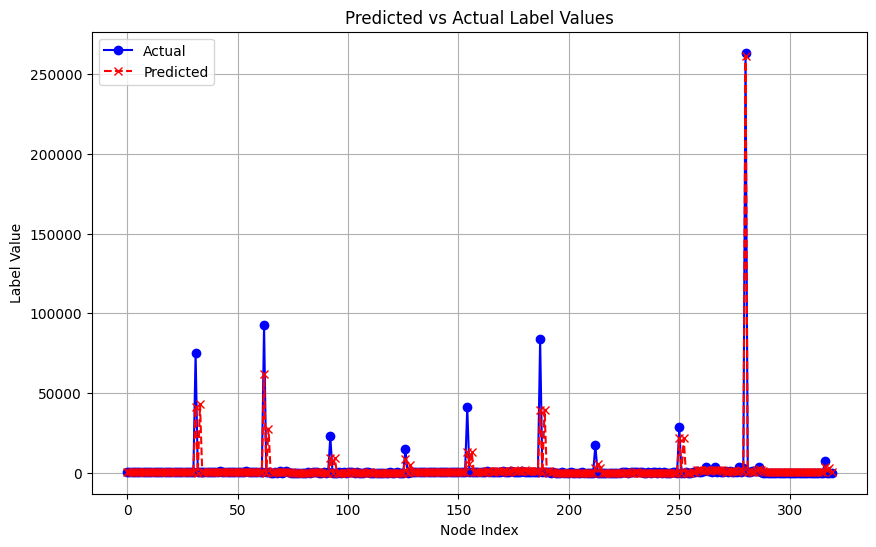

In [ ]:
import torch
import json
from torch_geometric.data import Data
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load preprocessed data
with open('/content/drive/MyDrive/Output (1)/preprocessed_data.json', 'r') as f:
    data_list = json.load(f)

node_features = []
labels = []
edge_index = []

for i, item in enumerate(data_list):
    features = []

    for key, value in item.items():
        if key == 'label':
            labels.append(value)
            continue

        # Flatten dictionary structure if needed
        if isinstance(value, dict):
            for sub_key, sub_val in value.items():
                features.append(sub_val if isinstance(sub_val, (int, float)) else 0)
        elif isinstance(value, (int, float)):
            features.append(value)
        else:
            features.append(0)

    node_features.append(features)

    if i > 0:
        edge_index.append([i - 1, i])

# Convert to tensors
node_features = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
labels = torch.tensor(labels, dtype=torch.float).unsqueeze(1)

# Create a Data object
data = Data(x=node_features, edge_index=edge_index, y=labels)

# ---------- STEP 3: GNN Model ----------
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels=node_features.shape[1], out_channels=16)
        self.conv2 = GCNConv(16, 8)
        self.fc = nn.Linear(8, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.fc(x)
        return x

model = GNNModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# ---------- STEP 4: Train ----------
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, data.y)  # Use data.y instead of labels directly
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# ---------- STEP 5: Evaluate and Plot Graph ----------
model.eval()
with torch.no_grad():
    predictions = model(data).cpu().numpy()
    labels_np = data.y.cpu().numpy()  # Use data.y for actual labels

    for i in range(len(predictions)):
        print(f"Node {i}: Prediction = {predictions[i][0]:.4f}, Actual = {labels_np[i][0]:.4f}")

    mse = mean_squared_error(labels_np, predictions)
    r2 = r2_score(labels_np, predictions)

    print(f"\nMean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score (Accuracy): {r2:.4f}")

    # Plotting Predicted vs Actual Values
    plt.figure(figsize=(10, 6))
    plt.plot(labels_np, label='Actual', color='blue', marker='o', linestyle='-', markersize=6)
    plt.plot(predictions, label='Predicted', color='red', marker='x', linestyle='--', markersize=6)
    plt.xlabel("Node Index")
    plt.ylabel("Label Value")
    plt.title("Predicted vs Actual Label Values")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import os
import json
import random

# Folder path where the original JSON files are located
folder_path = '/content/drive/MyDrive/Output (1)/Output'

# Function to recursively find all JSON files in the folder and its subfolders
def load_json_files_from_subfolders(folder_path):
    json_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    return json_files

# Function to generate preprocessed data based on the structure of the original JSON file
def generate_preprocessed_data(original_data):
    preprocessed_data = {}

    # Example: Generate preprocessed values for different features
    for key, value in original_data.items():
        if isinstance(value, dict):
            # Recursively handle nested dictionaries
            preprocessed_data[key] = generate_preprocessed_data(value)
        elif isinstance(value, list):
            # Generate preprocessed list data
            preprocessed_data[key] = [generate_preprocessed_data(item) if isinstance(item, dict) else item for item in value]
        elif isinstance(value, (int, float)):
            # Add small random noise to numeric data for preprocessed generation
            preprocessed_data[key] = value + random.uniform(-0.1, 0.1)
        else:
            # For strings, randomly choose a string from the original set
            preprocessed_data[key] = value

    return preprocessed_data

# Function to process JSON files
def process_json_files(json_files):
    preprocessed_data_list = []

    for json_file in json_files:
        with open(json_file, 'r') as f:
            original_data = json.load(f)

        # Generate preprocessed data
        preprocessed_data = generate_preprocessed_data(original_data)
        preprocessed_data_list.append(preprocessed_data)

    return preprocessed_data_list

# Function to save the preprocessed data to a new file
def save_preprocessed_data(preprocessed_data, output_file):
    with open(output_file, 'w') as f:
        json.dump(preprocessed_data, f, indent=4)

# Load JSON files from the specified folder and subfolders
json_files = load_json_files_from_subfolders(folder_path)

# Process the JSON files to generate preprocessed data
preprocessed_data = process_json_files(json_files)

# Save the preprocessed data to a new JSON file
output_file = '/content/drive/MyDrive/Output (1)/preprocessed_data.json'
save_preprocessed_data(preprocessed_data, output_file)

print(f"Preprocessed data has been saved to {output_file}")
